1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

The procedures lead to a close result? True
What percent of the total dataset's variability is explained by the principal components? 1.0
Given how the dataset was constructed, do these make sense? Yes, this indicates that the dataset can be well defined in a lower dimension space.


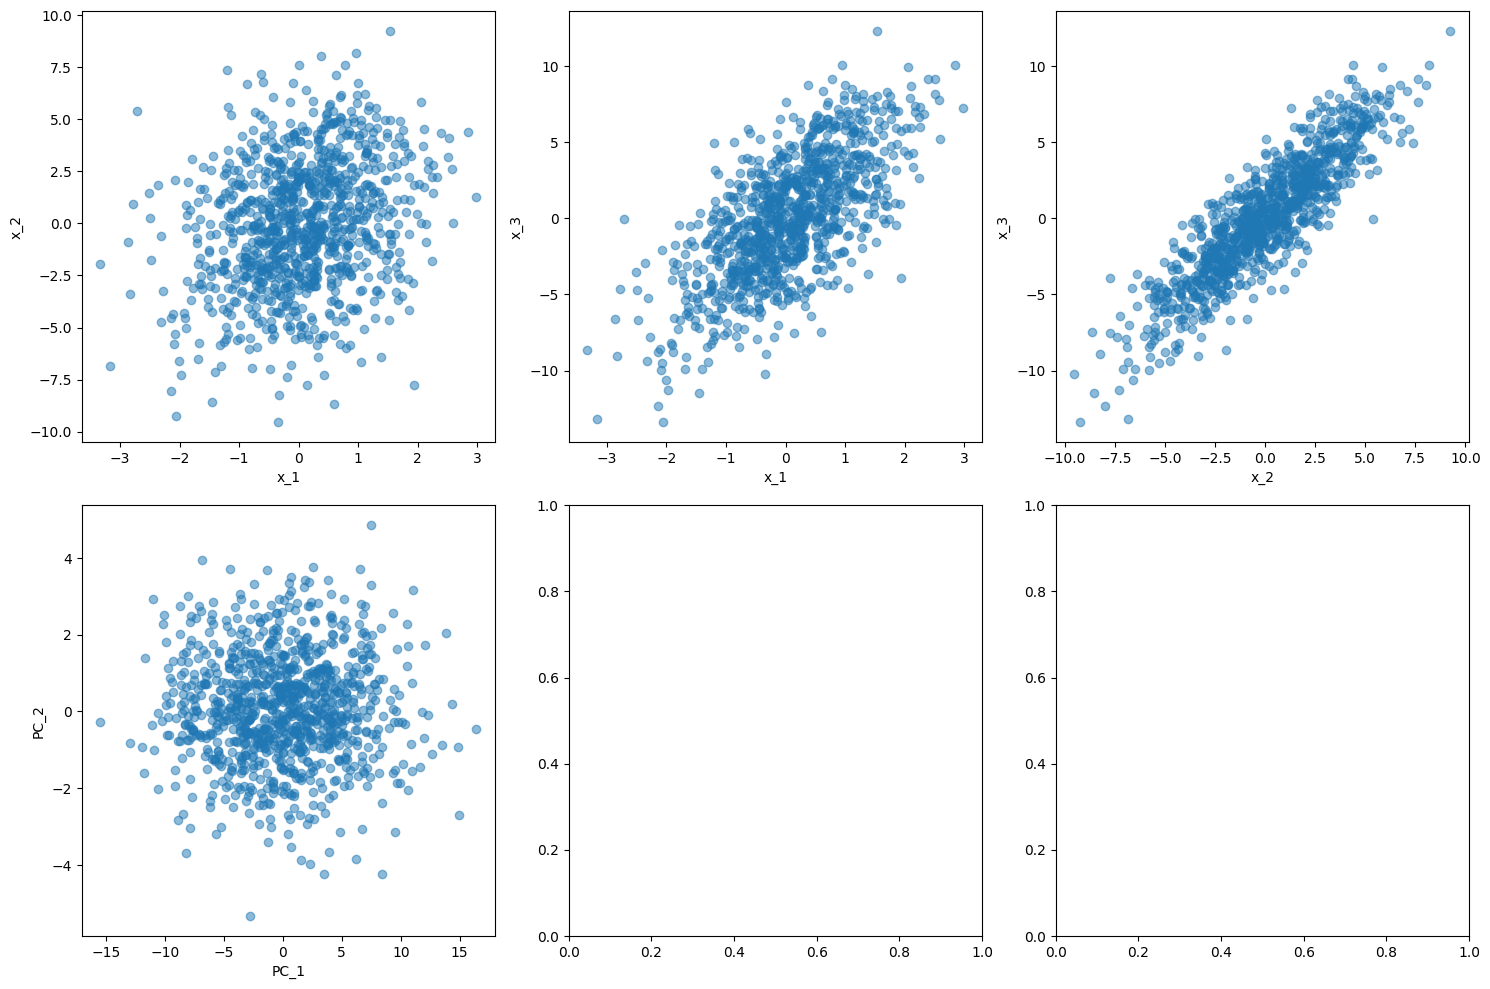

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2
data = np.column_stack((x1, x2, x3))
cov_matrix = np.cov(data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
U, s, Vt = np.linalg.svd(data, full_matrices=False)
eigenvalues_svd = s ** 2 / (N - 1)
for i in range(eigenvectors.shape[1]):
    if np.dot(eigenvectors[:, i], Vt[i]) < 0:
        eigenvectors[:, i] *= -1

eigenvectors_close = np.allclose(eigenvectors, Vt.T, rtol=1e-3, atol=1e-3)
print("The procedures lead to a close result?", eigenvectors_close)

#reduce the dimensionality of the system so that at least 99% of the total variability is retained
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
total_variability_explained = np.sum(explained_variance_ratio)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components_99_percent = np.argmax(cumulative_variance_ratio >= 0.99) + 1
print("What percent of the total dataset's variability is explained by the principal components?", total_variability_explained)
print("Given how the dataset was constructed, do these make sense? Yes, this indicates that the dataset can be well defined in a lower dimension space.")

#redefine the data according to the new basis from the PCA
new_basis = eigenvectors[:, :num_components_99_percent]
reduced_data = np.dot(data, new_basis)

#plot the data, in both the original and the new basis.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].scatter(data[:, 0], data[:, 1], alpha=0.5)
axs[0, 0].set_xlabel('x_1')
axs[0, 0].set_ylabel('x_2')
axs[0, 1].scatter(data[:, 0], data[:, 2], alpha=0.5)
axs[0, 1].set_xlabel('x_1')
axs[0, 1].set_ylabel('x_3')
axs[0, 2].scatter(data[:, 1], data[:, 2], alpha=0.5)
axs[0, 2].set_xlabel('x_2')
axs[0, 2].set_ylabel('x_3')
axs[1, 0].scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
axs[1, 0].set_xlabel('PC_1')
axs[1, 0].set_ylabel('PC_2')
plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [4]:
#find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix + adding some noise
N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2
data = np.array([x1, x2, x3]).T
mean = np.mean(data, axis=0)
centered_data = data - mean
num_noise_variables = 10
std_dev_noise = 0.05
noise = np.random.normal(0, std_dev_noise, size=(N, num_noise_variables))
extended_data = np.hstack((centered_data, noise))
cov_matrix_extended = np.cov(extended_data, rowvar=False)
eigenvalues_extended, eigenvectors_extended = np.linalg.eig(cov_matrix_extended)
sorted_indices_extended = np.argsort(eigenvalues_extended)[::-1]
eigenvalues_extended = eigenvalues_extended[sorted_indices_extended]
eigenvectors_extended = eigenvectors_extended[:, sorted_indices_extended]

#find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
U_extended, s_extended, Vt_extended = np.linalg.svd(extended_data)
eigenvectors_close_extended = np.allclose(eigenvectors_extended, Vt_extended.T, rtol=1e-3, atol=1e-3)
print("The procedures lead to a close result?", eigenvectors_close)

#calculate explained variance ratio for the extended dataset
explained_var_ratio_extended = eigenvalues_extended / np.sum(eigenvalues_extended)
print("\nExplained Variance Ratio (Extended):", explained_var_ratio_extended)

#calculate cumulative explained variance for the extended dataset
cumulative_var_ratio_extended = np.cumsum(explained_var_ratio_extended)
print("\nCumulative Explained Variance Ratio (Extended):", cumulative_var_ratio_extended)

#find the number of components required to retain 99% of the variability for the extended dataset
num_components_extended = np.argmax(cumulative_var_ratio_extended >= 0.99) + 1
print("\nNumber of components to retain 99% variability (Extended):", num_components_extended)

#compare with the number of components from the previous exercise
print("\nNumber of components to retain 99% variability (Original):", num_components_99_percent)

The procedures lead to a close result? True

Explained Variance Ratio (Extended): [ 9.27216585e-01  7.19219876e-02  1.01356142e-04  9.74931909e-05
  9.36629216e-05  9.03392745e-05  8.84154477e-05  8.23918358e-05
  8.19137086e-05  7.79010523e-05  7.54714729e-05  7.24826209e-05
 -5.07138508e-17]

Cumulative Explained Variance Ratio (Extended): [0.92721658 0.99913857 0.99923993 0.99933742 0.99943108 0.99952142
 0.99960984 0.99969223 0.99977414 0.99985205 0.99992752 1.
 1.        ]

Number of components to retain 99% variability (Extended): 2

Number of components to retain 99% variability (Original): 2


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [5]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 